In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# **Dataset loading and exploration**

In [37]:
!kaggle datasets download -d gaurav2022/mobile-health
!unzip mobile-health.zip


df = pd.read_csv('mhealth_raw_data.csv')

Dataset URL: https://www.kaggle.com/datasets/gaurav2022/mobile-health
License(s): CC0-1.0
mobile-health.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  mobile-health.zip
replace mhealth_raw_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [38]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [40]:
df.drop(columns=['subject'], inplace=True)

In [41]:
num_activities = df['Activity'].nunique()
print("Number of unique activities:", num_activities)

Number of unique activities: 13


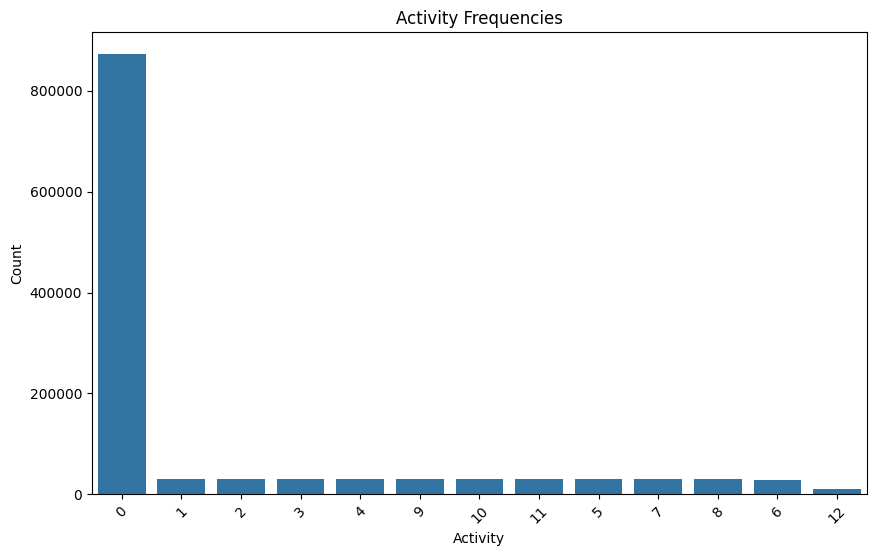

In [42]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=df, order=df['Activity'].value_counts().index)
plt.title('Activity Frequencies')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [43]:
activity_counts = df['Activity'].value_counts()
print(activity_counts)

Activity
0     872550
1      30720
2      30720
3      30720
4      30720
9      30720
10     30720
11     30720
5      30720
7      29441
8      29337
6      28315
12     10342
Name: count, dtype: int64


In [44]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Activity', axis=1)  # Features
y = df['Activity']  # Target

undersample = RandomUnderSampler(sampling_strategy='auto')  # Automatically balances the classes
X_resampled, y_resampled = undersample.fit_resample(X, y)

sampled_df = pd.DataFrame(X_resampled, columns=X.columns)
sampled_df['Activity'] = y_resampled

print(sampled_df['Activity'].value_counts())

Activity
0     10342
1     10342
2     10342
3     10342
4     10342
5     10342
6     10342
7     10342
8     10342
9     10342
10    10342
11    10342
12    10342
Name: count, dtype: int64


In [45]:
grouped = sampled_df.groupby('Activity')
grouped_sampled_df = pd.DataFrame()
percentage_to_take = 0.09

for activity, group_df in grouped:
    num_samples = int(len(group_df) * percentage_to_take)
    sampled_class_df = group_df.sample(n=num_samples, random_state=42)
    grouped_sampled_df = pd.concat([grouped_sampled_df, sampled_class_df], ignore_index=True)

grouped_sampled_df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity
0,1.05380,-9.4951,0.98370,-0.497220,-0.60976,0.44401,-6.94800,-6.15350,1.65070,-1.05490,-0.24435,-0.019397,0
1,1.75320,-8.9897,1.02640,0.441560,-0.69231,-0.66405,0.44110,-9.52530,-2.52830,0.51569,-0.84600,-0.579740,0
2,1.87830,-9.5572,0.71801,0.742120,-0.64540,-0.13556,-2.38050,-9.38850,0.14516,0.42157,-1.00620,0.407330,0
3,-5.79000,-14.7420,-1.90960,-0.387760,-0.73921,-0.69548,-6.60950,-7.92380,-4.37540,-0.51373,-0.91376,-0.721980,0
4,1.06080,-9.5380,1.64830,-0.217070,-0.86679,-0.52456,-3.13660,-8.90810,2.19000,-0.02549,-1.02870,-0.379310,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12085,1.30640,-3.9608,-5.97660,-0.612240,-0.71482,0.38114,-9.33680,-4.30010,0.99333,-0.96471,0.38193,0.346980,12
12086,0.23695,-19.2860,-5.79520,0.727270,-0.29644,-0.72888,-15.67400,-6.81920,5.07570,-0.37647,-1.02870,0.288790,12
12087,-8.03750,-5.9275,-6.61630,0.306120,-0.75047,-0.64833,-21.66900,5.99300,8.29970,-0.70000,0.31828,0.797410,12
12088,8.84270,-3.1746,-3.60160,0.419290,-0.82739,0.22593,-0.25902,-0.30265,2.73490,-0.70196,-0.49692,0.706900,12


In [46]:
activity_counts = grouped_sampled_df['Activity'].value_counts()
print(activity_counts)

Activity
0     930
1     930
2     930
3     930
4     930
5     930
6     930
7     930
8     930
9     930
10    930
11    930
12    930
Name: count, dtype: int64


## **Visualization of sample data points**

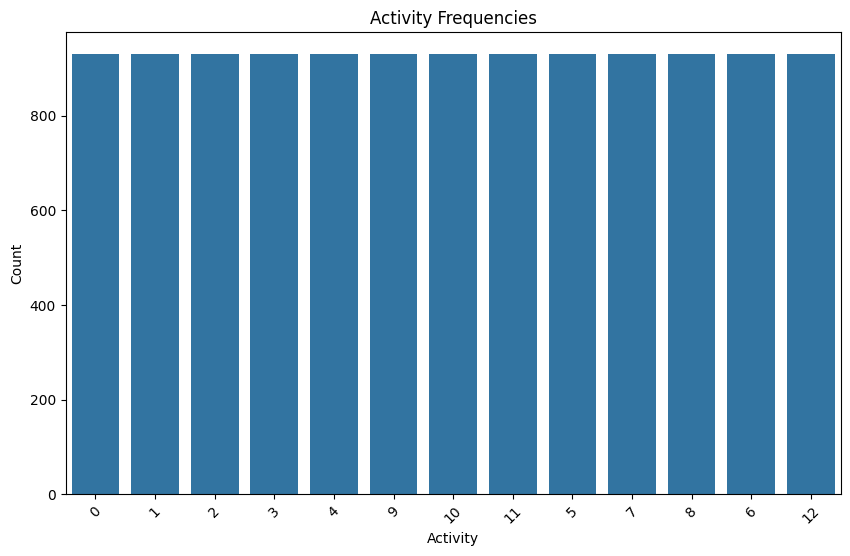

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Activity', data=grouped_sampled_df, order=df['Activity'].value_counts().index)
plt.title('Activity Frequencies')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

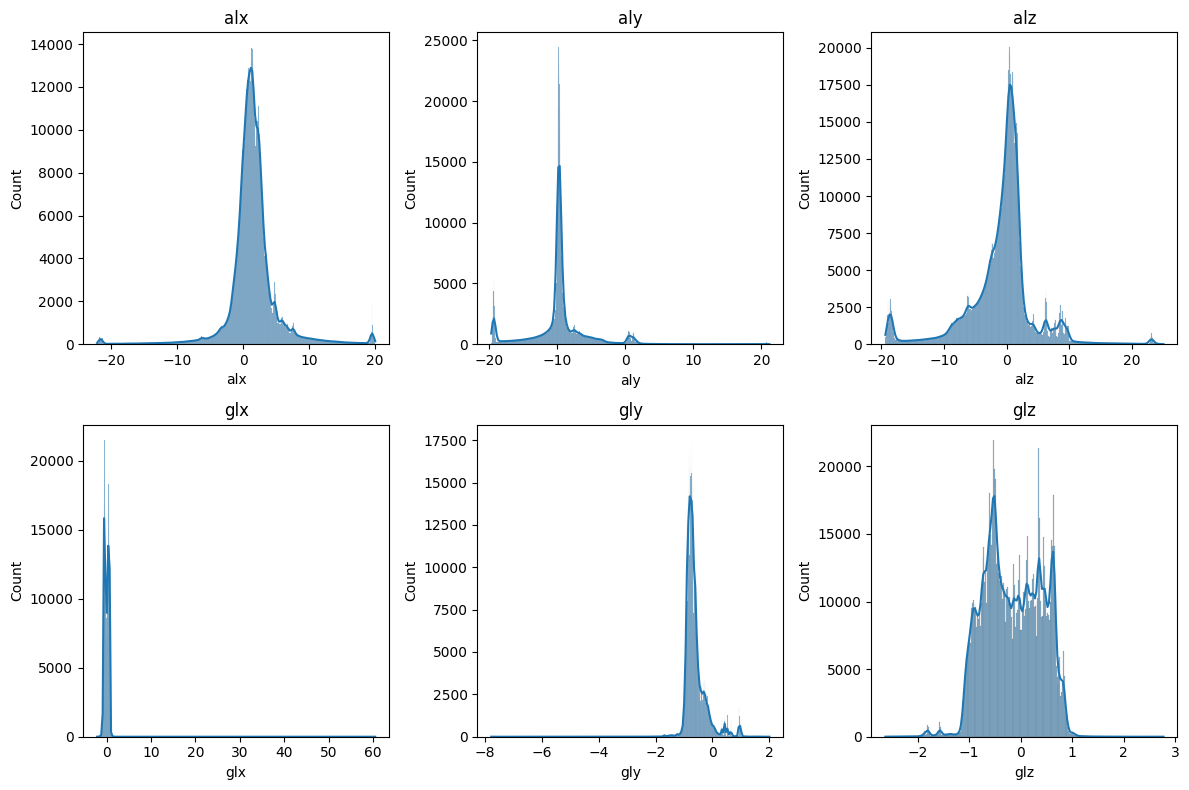

In [48]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['alx', 'aly', 'alz', 'glx', 'gly', 'glz']):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

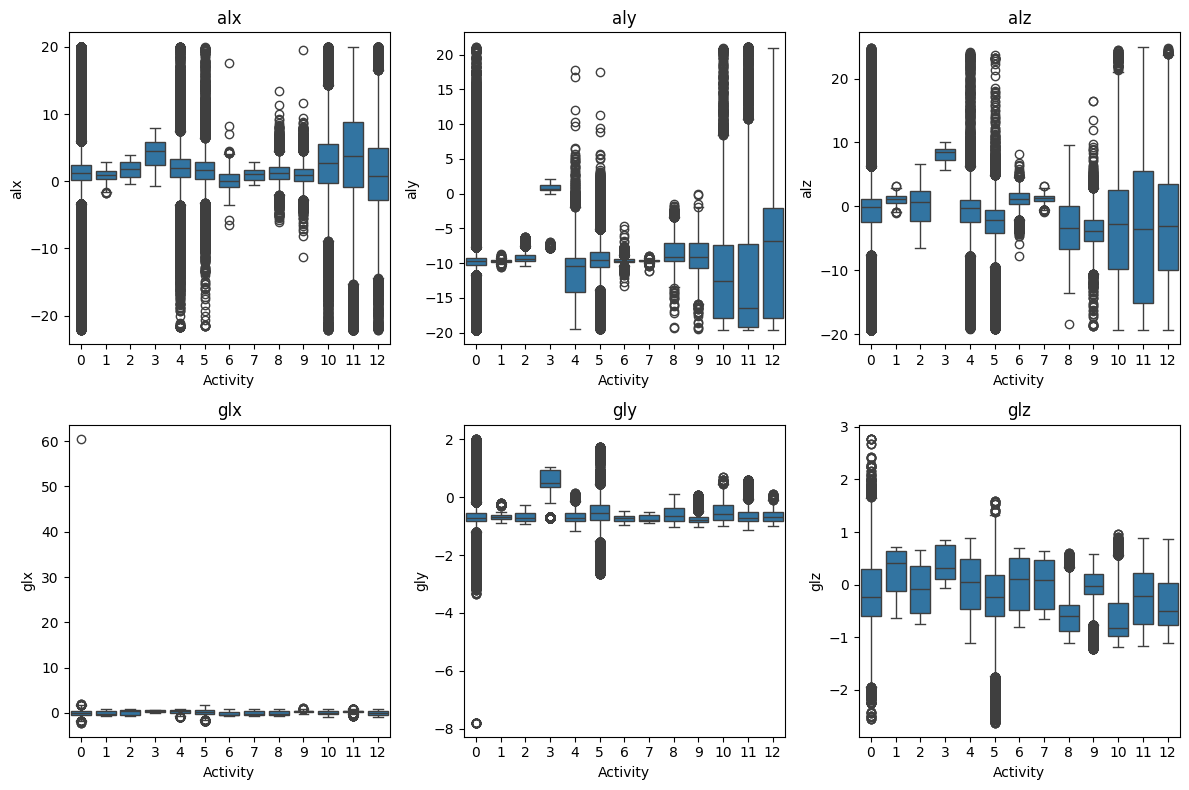

In [49]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(['alx', 'aly', 'alz', 'glx', 'gly', 'glz']):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='Activity', y=col, data=df)
    plt.title(col)
plt.tight_layout()
plt.show()

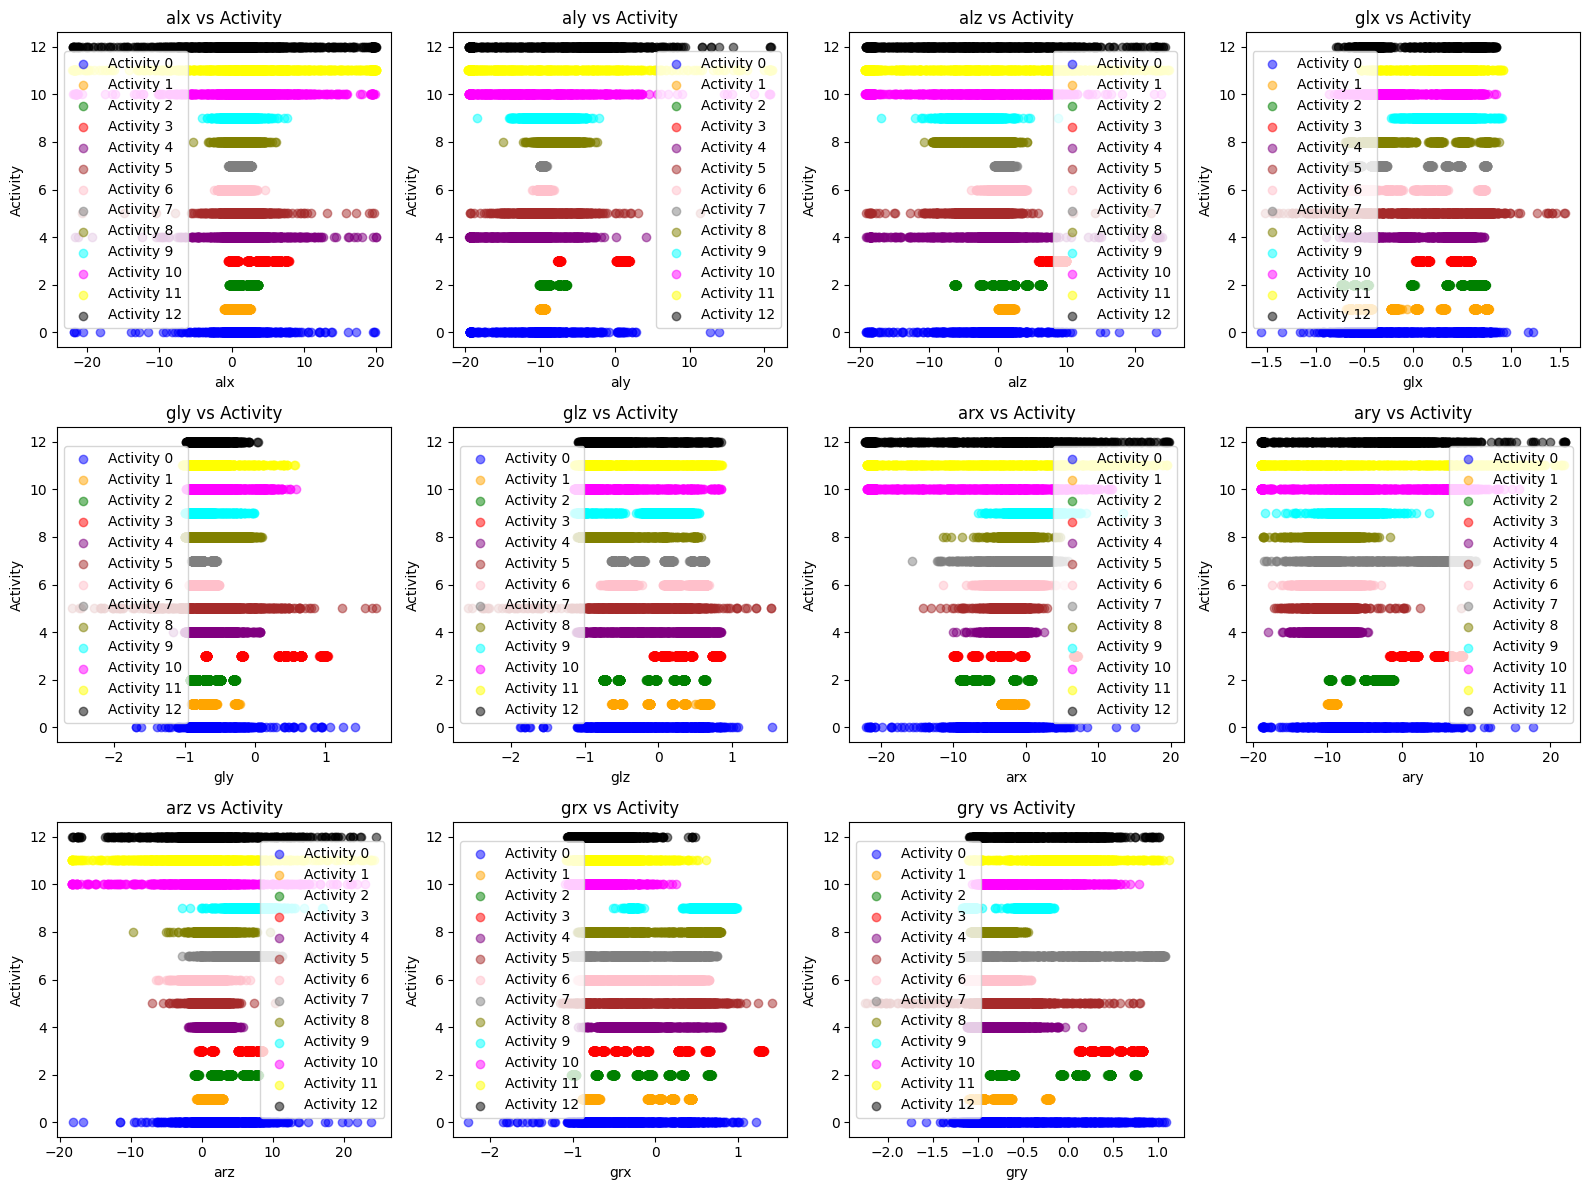

In [50]:
plt.figure(figsize=(16, 12))

activity_colors = {
    0: 'blue', 1: 'orange', 2: 'green', 3: 'red', 4: 'purple',
    5: 'brown', 6: 'pink', 7: 'gray', 8: 'olive', 9: 'cyan',
    10: 'magenta', 11: 'yellow', 12: 'black'
}
for i, feature in enumerate(grouped_sampled_df.columns[:-2]):
    plt.subplot(3, 4, i + 1)
    for activity, data in grouped_sampled_df.groupby('Activity'):
        plt.scatter(data[feature], data['Activity'], label=f'Activity {activity}', color=activity_colors[activity], alpha=0.5)
    plt.title(f'{feature} vs Activity')
    plt.xlabel(feature)
    plt.ylabel('Activity')
    plt.legend()

plt.tight_layout()
plt.show()

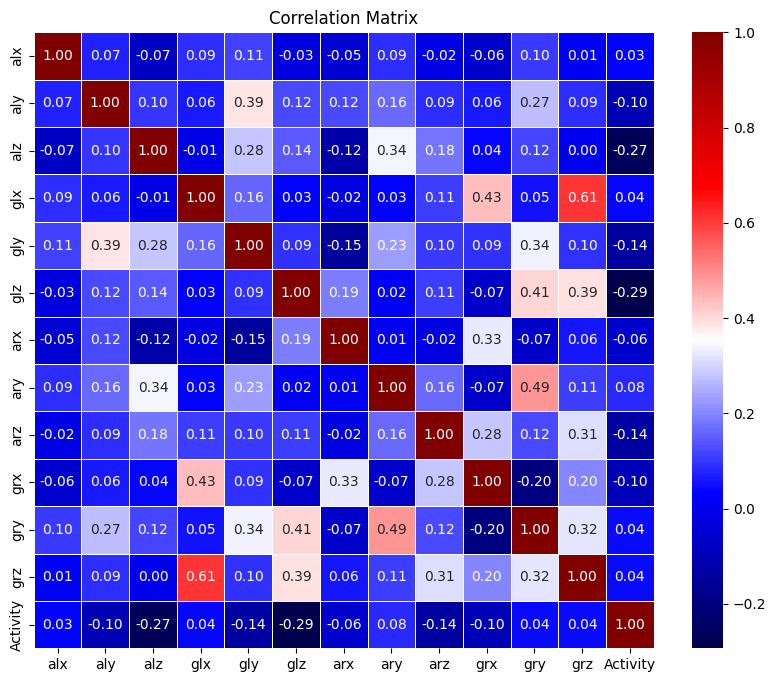

In [51]:
corr_matrix = grouped_sampled_df.corr()
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='seismic', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [52]:
# Dividing data for train and test
X = grouped_sampled_df.drop(columns=['Activity'])
y = grouped_sampled_df['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
evaluation_results = {}

# **KNN**

In [53]:
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [54]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

In [55]:
# Evaluation
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", knn_accuracy)

knn_precision = precision_score(y_test, y_pred_knn, average='macro')
print("precision:", knn_precision)

knn_recall = recall_score(y_test, y_pred_knn, average='macro')
print("recall:", knn_recall)

knn_f1 = f1_score(y_test, y_pred_knn, average='macro')
print("F1-score:", knn_f1)

knn_conf_matrix = confusion_matrix(y_test, y_pred_knn)
print("confusion matrix: \n", knn_conf_matrix)

Accuracy: 0.8064516129032258
precision: 0.7960067154753067
recall: 0.8075893057291914
F1-score: 0.7958529535578948
confusion matrix: 
 [[ 52   9   8   3  16  12  15  22  14  17   9   6   7]
 [  0 191   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 191   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 191   0   0   0   0   0   0   0   0   0]
 [  7   0   0   0 155  12   4   0   4   0   1   0   0]
 [ 10   0   0   0  26 124   4   2  20   0   3   0   1]
 [  4   2   0   0   1   1 163   6   1   0   0   0   0]
 [  3   2   1   0   1   0   4 155   0   1   0   0   0]
 [  2   5   1   0   0   6  11   3 164   2   0   0   0]
 [  3   0   0   0   0   0   0   7   2 174   0   0   0]
 [  7   0   1   1   6   1   1   0   0   1 142  17   9]
 [  3   0   1   0   4   1   1   1   2   0  39 126  12]
 [  9   0   0   0   7   0   1   1   1   0  22  18 122]]


In [56]:
evaluation_results['KNN'] = {
    'accuracy': knn_accuracy,
    'precision': knn_precision,
    'recall': knn_recall,
    'f1_score': knn_f1,
    'confusion_matrix': knn_conf_matrix
}

# **Linear Regression**

> Used 1 vs ALL



In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

binary_labels = []
for class_label in range(num_activities):
    binary_label = (y_train == class_label).astype(int)
    binary_labels.append(binary_label)


linear_regression_models = []
for class_label in range(num_activities):
    model = LinearRegression()
    model.fit(X_train, binary_labels[class_label])
    linear_regression_models.append(model)


probabilities = np.zeros((len(X_test), num_activities))
for class_label in range(num_activities):
    probabilities[:, class_label] = linear_regression_models[class_label].predict(X_test)

predicted_classes = np.argmax(probabilities, axis=1)

mse = mean_squared_error(y_test, predicted_classes)
print("Mean Squared Error (MSE):", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("\n")

for class_label in range(num_activities):
    binary_y_test = (y_test == class_label).astype(int)
    binary_y_pred = (predicted_classes == class_label).astype(int)

    accuracy = accuracy_score(binary_y_test, binary_y_pred)

    print(f"Results for class {class_label}:")
    print(f"Accuracy: {accuracy}")
    print()

    model_name = f'Linear Regression (Class {class_label})'
    evaluation_results[model_name] = {
        'accuracy': accuracy
    }

Mean Squared Error (MSE): 11.855665839536806
Root Mean Squared Error (RMSE): 3.4432057503926203


Results for class 0:
Accuracy: 0.9214226633581473

Results for class 1:
Accuracy: 0.8974358974358975

Results for class 2:
Accuracy: 0.9288668320926385

Results for class 3:
Accuracy: 0.9582299421009098

Results for class 4:
Accuracy: 0.9098428453267163

Results for class 5:
Accuracy: 0.9210090984284532

Results for class 6:
Accuracy: 0.9040529363110008

Results for class 7:
Accuracy: 0.9214226633581473

Results for class 8:
Accuracy: 0.8999172870140613

Results for class 9:
Accuracy: 0.9044665012406948

Results for class 10:
Accuracy: 0.9156327543424317

Results for class 11:
Accuracy: 0.9148056244830438

Results for class 12:
Accuracy: 0.923490488006617



# **Support Vector Machine (SVM)**

In [58]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

In [59]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm, average='macro', zero_division=1)
svm_recall = recall_score(y_test, y_pred_svm, average='macro', zero_division=1)
svm_f1 = f1_score(y_test, y_pred_svm, average='macro')
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)

print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-score:", svm_f1)
print("Confusion Matrix:\n", svm_conf_matrix)

evaluation_results['SVM'] = {
    'accuracy': svm_accuracy,
    'precision': svm_precision,
    'recall': svm_recall,
    'f1_score': svm_f1,
    'confusion_matrix': svm_conf_matrix
}

Accuracy: 0.717535153019024
Precision: 0.7120930646253664
Recall: 0.7181329039585618
F1-score: 0.7047078060426836
Confusion Matrix:
 [[ 26  39  22   3  13  15  10  13  10  17   9   4   9]
 [  0 177   0   0   0   0  14   0   0   0   0   0   0]
 [  0   0 175   0   0   0   0   0  16   0   0   0   0]
 [  0   0   0 191   0   0   0   0   0   0   0   0   0]
 [  0  22   0   0 118  27   7   1   6   0   1   0   1]
 [  7   6   3   0  40  98   8   1  23   0   1   0   3]
 [  4  35   1   0   2   1 128   0   7   0   0   0   0]
 [  2  16  11   0   2   0   5 131   0   0   0   0   0]
 [  0  43   1   0   0   9  19   0 118   4   0   0   0]
 [  2   0   4   0   1   0   0   7   1 171   0   0   0]
 [ 12   0   1   1   4   2   0   0   0   0 125  24  17]
 [  4   0   1   0   1   1   0   1   1   0  23 146  12]
 [  8   0   0   0   4   0   1   0   1   0  18  18 131]]


# **Neural Network**

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout #makes summation, activation
import matplotlib.pyplot as plt
from keras.optimizers import SGD, Adam

In [61]:
std_scaler = StandardScaler()
X_scale = std_scaler.fit_transform(X)

X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, y, test_size=0.3, random_state=1)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5, random_state=1)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(8463, 12) (1813, 12) (1814, 12) (8463,) (1813,) (1814,)


In [62]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_activities)
Y_val = to_categorical(Y_val, num_activities)
Y_test = to_categorical(Y_test, num_activities)
print(Y_train.shape, Y_val.shape, Y_test.shape)

(8463, 13) (1813, 13) (1814, 13)


In [63]:
!pip install scikeras

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier

def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_activities, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=0)


In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Fit the model
model.fit(X_train, Y_train)

# Make predictions
y_pred_nn = np.argmax(model.predict(X_val), axis=1)

# Calculate evaluation metrics
nn_accuracy = accuracy_score(Y_val.argmax(axis=1), y_pred_nn)
nn_precision = precision_score(Y_val.argmax(axis=1), y_pred_nn, average='macro', zero_division=1)
nn_recall = recall_score(Y_val.argmax(axis=1), y_pred_nn, average='macro', zero_division=1)
nn_f1 = f1_score(Y_val.argmax(axis=1), y_pred_nn, average='macro')
nn_conf_matrix = confusion_matrix(Y_val.argmax(axis=1), y_pred_nn)

# Print metrics
print("Accuracy:", nn_accuracy)
print("Precision:", nn_precision)
print("Recall:", nn_recall)
print("F1-score:", nn_f1)
print("Confusion Matrix:\n", nn_conf_matrix)

# Store results in a dictionary
evaluation_results = {}
evaluation_results['Neural Network'] = {
    'accuracy': nn_accuracy,
    'precision': nn_precision,
    'recall': nn_recall,
    'f1_score': nn_f1,
    'confusion_matrix': nn_conf_matrix
}

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Accuracy: 0.7418643132928847
Precision: 0.7291068878521431
Recall: 0.7444875173549115
F1-score: 0.709951076809819
Confusion Matrix:
 [[  9  13  13   1  17   7  20  11  19  11  11  11   7]
 [  0 125   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 153   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 136   0   0   0   0   0   0   0   0   0]
 [  0  10   0   0 119   0   2   0   4   0   0   1   0]
 [  4   8   5   0  36  47   5   0  25   0   0   0   6]
 [  0   9   0   0   1   0 108   0   2   0   0   0   0]
 [  5   8   6   0   2   0  15 110   0   1   0   0   0]
 [  1   6   0   0   1   4  24   0  89   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2 159   0   0   0]
 [  1   0   0   0   0   0   0   0   0   0  85  46  17]
 [  0   0   0   0   0   0   0   0   0   0   8 130   4]
 [  2   0   0   0   6   0   0   0   2   0  23  25  75]]


# **Logistic Regression**

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101, shuffle=True)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000, solver='saga')
log_reg.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test_scaled)

In [69]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log_reg)
log_reg_precision = precision_score(y_test, y_pred_log_reg, average='macro')
log_reg_recall = recall_score(y_test, y_pred_log_reg, average='macro')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='macro')
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

print("Accuracy:", log_reg_accuracy)
print("Precision:", log_reg_precision)
print("Recall:", log_reg_recall)
print("F1-score:", log_reg_f1)
print("Confusion Matrix:\n", log_reg_conf_matrix)

evaluation_results['Logistic Regression'] = {
    'accuracy': log_reg_accuracy,
    'precision': log_reg_precision,
    'recall': log_reg_recall,
    'f1_score': log_reg_f1,
    'confusion_matrix': log_reg_conf_matrix
}

Accuracy: 0.5558312655086849
Precision: 0.5340224116303391
Recall: 0.5553520044291962
F1-score: 0.5387557430316522
Confusion Matrix:
 [[ 11  26  20   5  13   8  20  17  21  16  14  11  10]
 [  0 128   0   0  20   0  26   0  18   0   0   0   0]
 [ 15   0 100   0   0  12   0  19   0  12   0  11   0]
 [  0   0   0 177   0   0   0   0   0   0   0   0   0]
 [  3  25   2   0  96  15  17   1  31   0   1   4   3]
 [ 16  12   5   4  26  47  18   4  26   3   3   3   8]
 [  7  29   0   0   5   2 115   1  30   0   0   0   1]
 [  9  13  22   5   6   0  14 112   0   7   0   0   4]
 [  4   8   0   0  11  17  26   1 111   0   2   1   6]
 [  2   0   0   0   0   0   0   9   6 182   0   0   0]
 [  6   0   3   0   2   0   2   1   0   1  95  31  46]
 [  2   0  19   0   7   6   6   1   2   2  14 105  15]
 [  3   8  10   0   9   0   3  12   7   0  44  20  65]]
